## Preliminaries

In [48]:
# Import packages

import numpy as np
import pickle as pkl
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from tempfile import NamedTemporaryFile
from IPython.display import HTML
import imageio
import base64

## Electrode Map

In [49]:
# Define the electrode array map

LITKE_519_ARRAY_MAP = np.array([
    [330.0, -225.0],
    [210.0, -195.0],
    [240.0, -210.0],
    [360.0, -210.0],
    [300.0, -210.0],
    [270.0, -195.0],
    [330.0, -195.0],
    [150.0, -135.0],
    [210.0, -165.0],
    [240.0, -180.0],
    [360.0, -180.0],
    [300.0, -180.0],
    [120.0, -120.0],
    [120.0, -90.0],
    [270.0, -165.0],
    [330.0, -165.0],
    [180.0, -150.0],
    [210.0, -135.0],
    [240.0, -150.0],
    [360.0, -150.0],
    [300.0, -150.0],
    [90.0, -75.0],
    [150.0, -105.0],
    [270.0, -135.0],
    [330.0, -135.0],
    [180.0, -120.0],
    [210.0, -105.0],
    [240.0, -120.0],
    [360.0, -120.0],
    [300.0, -120.0],
    [90.0, -45.0],
    [150.0, -75.0],
    [270.0, -105.0],
    [330.0, -105.0],
    [180.0, -90.0],
    [210.0, -75.0],
    [240.0, -90.0],
    [360.0, -90.0],
    [300.0, -90.0],
    [120.0, -60.0],
    [150.0, -45.0],
    [270.0, -75.0],
    [330.0, -75.0],
    [180.0, -60.0],
    [210.0, -45.0],
    [240.0, -60.0],
    [360.0, -60.0],
    [300.0, -60.0],
    [60.0, -30.0],
    [30.0, -15.0],
    [270.0, -45.0],
    [330.0, -45.0],
    [120.0, -30.0],
    [180.0, -30.0],
    [240.0, -30.0],
    [360.0, -30.0],
    [300.0, -30.0],
    [90.0, -15.0],
    [150.0, -15.0],
    [270.0, -15.0],
    [330.0, -15.0],
    [210.0, -15.0],
    [120.0, 0],
    [240.0, 0],
    [360.0, 0],
    [300.0, 0],
    [180.0, 0],
    [210.0, 15.0],
    [330.0, 15.0],
    [270.0, 15.0],
    [150.0, 15.0],
    [90.0, 15.0],
    [300.0, 30.0],
    [360.0, 30.0],
    [240.0, 30.0],
    [180.0, 30.0],
    [120.0, 30.0],
    [330.0, 45.0],
    [270.0, 45.0],
    [60.0, 0],
    [60.0, 30.0],
    [300.0, 60.0],
    [360.0, 60.0],
    [240.0, 60.0],
    [210.0, 45.0],
    [180.0, 60.0],
    [330.0, 75.0],
    [270.0, 75.0],
    [150.0, 45.0],
    [120.0, 60.0],
    [300.0, 90.0],
    [360.0, 90.0],
    [240.0, 90.0],
    [210.0, 75.0],
    [180.0, 90.0],
    [330.0, 105.0],
    [270.0, 105.0],
    [150.0, 75.0],
    [90.0, 45.0],
    [300.0, 120.0],
    [360.0, 120.0],
    [240.0, 120.0],
    [210.0, 105.0],
    [180.0, 120.0],
    [330.0, 135.0],
    [270.0, 135.0],
    [150.0, 105.0],
    [90.0, 75.0],
    [300.0, 150.0],
    [360.0, 150.0],
    [240.0, 150.0],
    [210.0, 135.0],
    [180.0, 150.0],
    [330.0, 165.0],
    [270.0, 165.0],
    [120.0, 90.0],
    [120.0, 120.0],
    [300.0, 180.0],
    [360.0, 180.0],
    [240.0, 180.0],
    [210.0, 165.0],
    [150.0, 135.0],
    [330.0, 195.0],
    [270.0, 195.0],
    [300.0, 210.0],
    [360.0, 210.0],
    [240.0, 210.0],
    [210.0, 195.0],
    [330.0, 225.0],
    [300.0, 240.0],
    [270.0, 225.0],
    [270.0, 255.0],
    [240.0, 270.0],
    [240.0, 240.0],
    [210.0, 285.0],
    [210.0, 255.0],
    [210.0, 225.0],
    [180.0, 240.0],
    [180.0, 270.0],
    [180.0, 300.0],
    [180.0, 210.0],
    [180.0, 180.0],
    [150.0, 165.0],
    [150.0, 195.0],
    [150.0, 225.0],
    [150.0, 255.0],
    [150.0, 285.0],
    [150.0, 315.0],
    [120.0, 150.0],
    [120.0, 180.0],
    [120.0, 210.0],
    [120.0, 240.0],
    [120.0, 270.0],
    [120.0, 300.0],
    [120.0, 330.0],
    [60.0, 60.0],
    [90.0, 105.0],
    [90.0, 135.0],
    [90.0, 165.0],
    [90.0, 195.0],
    [90.0, 225.0],
    [90.0, 255.0],
    [90.0, 285.0],
    [90.0, 315.0],
    [90.0, 345.0],
    [60.0, 90.0],
    [60.0, 120.0],
    [60.0, 150.0],
    [60.0, 180.0],
    [60.0, 210.0],
    [60.0, 240.0],
    [60.0, 270.0],
    [60.0, 300.0],
    [60.0, 330.0],
    [60.0, 360.0],
    [30.0, 105.0],
    [30.0, 135.0],
    [30.0, 165.0],
    [30.0, 195.0],
    [30.0, 225.0],
    [30.0, 255.0],
    [30.0, 285.0],
    [30.0, 315.0],
    [30.0, 345.0],
    [30.0, 375.0],
    [30.0, 75.0],
    [30.0, 45.0],
    [30.0, 15.0],
    [0, 30.0],
    [0, 90.0],
    [0, 150.0],
    [0, 210.0],
    [0, 270.0],
    [0, 330.0],
    [0, 390.0],
    [0, 360.0],
    [0, 300.0],
    [0, 240.0],
    [0, 180.0],
    [0, 120.0],
    [0, 60.0],
    [-30.0, 15.0],
    [-30.0, 45.0],
    [-30.0, 75.0],
    [-30.0, 375.0],
    [-30.0, 345.0],
    [-30.0, 315.0],
    [-30.0, 285.0],
    [-30.0, 255.0],
    [-30.0, 225.0],
    [-30.0, 195.0],
    [-30.0, 165.0],
    [-30.0, 135.0],
    [-30.0, 105.0],
    [-60.0, 360.0],
    [-60.0, 330.0],
    [-60.0, 300.0],
    [-60.0, 270.0],
    [-60.0, 240.0],
    [-60.0, 210.0],
    [-60.0, 180.0],
    [-60.0, 150.0],
    [-60.0, 120.0],
    [-60.0, 90.0],
    [-90.0, 345.0],
    [-90.0, 315.0],
    [-90.0, 285.0],
    [-90.0, 255.0],
    [-90.0, 225.0],
    [-90.0, 195.0],
    [-90.0, 165.0],
    [-90.0, 135.0],
    [-90.0, 105.0],
    [-60.0, 60.0],
    [-120.0, 330.0],
    [-120.0, 300.0],
    [-120.0, 270.0],
    [-120.0, 240.0],
    [-120.0, 210.0],
    [-120.0, 180.0],
    [-120.0, 150.0],
    [-150.0, 315.0],
    [-150.0, 285.0],
    [-150.0, 255.0],
    [-150.0, 225.0],
    [-150.0, 195.0],
    [-150.0, 165.0],
    [-180.0, 180.0],
    [-180.0, 210.0],
    [-180.0, 300.0],
    [-180.0, 270.0],
    [-180.0, 240.0],
    [-210.0, 225.0],
    [-210.0, 255.0],
    [-210.0, 285.0],
    [-240.0, 240.0],
    [-240.0, 270.0],
    [-270.0, 255.0],
    [-300.0, 240.0],
    [-270.0, 225.0],
    [-330.0, 225.0],
    [-210.0, 195.0],
    [-240.0, 210.0],
    [-360.0, 210.0],
    [-300.0, 210.0],
    [-270.0, 195.0],
    [-330.0, 195.0],
    [-150.0, 135.0],
    [-210.0, 165.0],
    [-240.0, 180.0],
    [-360.0, 180.0],
    [-300.0, 180.0],
    [-120.0, 120.0],
    [-120.0, 90.0],
    [-270.0, 165.0],
    [-330.0, 165.0],
    [-180.0, 150.0],
    [-210.0, 135.0],
    [-240.0, 150.0],
    [-360.0, 150.0],
    [-300.0, 150.0],
    [-90.0, 75.0],
    [-150.0, 105.0],
    [-270.0, 135.0],
    [-330.0, 135.0],
    [-180.0, 120.0],
    [-210.0, 105.0],
    [-240.0, 120.0],
    [-360.0, 120.0],
    [-300.0, 120.0],
    [-90.0, 45.0],
    [-150.0, 75.0],
    [-270.0, 105.0],
    [-330.0, 105.0],
    [-180.0, 90.0],
    [-210.0, 75.0],
    [-240.0, 90.0],
    [-360.0, 90.0],
    [-300.0, 90.0],
    [-120.0, 60.0],
    [-150.0, 45.0],
    [-270.0, 75.0],
    [-330.0, 75.0],
    [-180.0, 60.0],
    [-210.0, 45.0],
    [-240.0, 60.0],
    [-360.0, 60.0],
    [-300.0, 60.0],
    [-60.0, 30.0],
    [-60.0, 0],
    [-270.0, 45.0],
    [-330.0, 45.0],
    [-120.0, 30.0],
    [-180.0, 30.0],
    [-240.0, 30.0],
    [-360.0, 30.0],
    [-300.0, 30.0],
    [-90.0, 15.0],
    [-150.0, 15.0],
    [-270.0, 15.0],
    [-330.0, 15.0],
    [-210.0, 15.0],
    [-180.0, 0],
    [-300.0, 0],
    [-360.0, 0],
    [-240.0, 0],
    [-120.0, 0],
    [-210.0, -15.0],
    [-330.0, -15.0],
    [-270.0, -15.0],
    [-150.0, -15.0],
    [-90.0, -15.0],
    [-300.0, -30.0],
    [-360.0, -30.0],
    [-240.0, -30.0],
    [-180.0, -30.0],
    [-120.0, -30.0],
    [-330.0, -45.0],
    [-270.0, -45.0],
    [-30.0, -15.0],
    [-60.0, -30.0],
    [-300.0, -60.0],
    [-360.0, -60.0],
    [-240.0, -60.0],
    [-210.0, -45.0],
    [-180.0, -60.0],
    [-330.0, -75.0],
    [-270.0, -75.0],
    [-150.0, -45.0],
    [-120.0, -60.0],
    [-300.0, -90.0],
    [-360.0, -90.0],
    [-240.0, -90.0],
    [-210.0, -75.0],
    [-180.0, -90.0],
    [-330.0, -105.0],
    [-270.0, -105.0],
    [-150.0, -75.0],
    [-90.0, -45.0],
    [-300.0, -120.0],
    [-360.0, -120.0],
    [-240.0, -120.0],
    [-210.0, -105.0],
    [-180.0, -120.0],
    [-330.0, -135.0],
    [-270.0, -135.0],
    [-150.0, -105.0],
    [-90.0, -75.0],
    [-300.0, -150.0],
    [-360.0, -150.0],
    [-240.0, -150.0],
    [-210.0, -135.0],
    [-180.0, -150.0],
    [-330.0, -165.0],
    [-270.0, -165.0],
    [-120.0, -90.0],
    [-120.0, -120.0],
    [-300.0, -180.0],
    [-360.0, -180.0],
    [-240.0, -180.0],
    [-210.0, -165.0],
    [-150.0, -135.0],
    [-330.0, -195.0],
    [-270.0, -195.0],
    [-300.0, -210.0],
    [-360.0, -210.0],
    [-240.0, -210.0],
    [-210.0, -195.0],
    [-330.0, -225.0],
    [-300.0, -240.0],
    [-270.0, -255.0],
    [-270.0, -225.0],
    [-240.0, -270.0],
    [-240.0, -240.0],
    [-210.0, -285.0],
    [-210.0, -255.0],
    [-210.0, -225.0],
    [-180.0, -240.0],
    [-180.0, -270.0],
    [-180.0, -300.0],
    [-180.0, -210.0],
    [-180.0, -180.0],
    [-150.0, -165.0],
    [-150.0, -195.0],
    [-150.0, -225.0],
    [-150.0, -255.0],
    [-150.0, -285.0],
    [-150.0, -315.0],
    [-120.0, -150.0],
    [-120.0, -180.0],
    [-120.0, -210.0],
    [-120.0, -240.0],
    [-120.0, -270.0],
    [-120.0, -300.0],
    [-120.0, -330.0],
    [-60.0, -60.0],
    [-90.0, -105.0],
    [-90.0, -135.0],
    [-90.0, -165.0],
    [-90.0, -195.0],
    [-90.0, -225.0],
    [-90.0, -255.0],
    [-90.0, -285.0],
    [-90.0, -315.0],
    [-90.0, -345.0],
    [-60.0, -90.0],
    [-60.0, -120.0],
    [-60.0, -150.0],
    [-60.0, -180.0],
    [-60.0, -210.0],
    [-60.0, -240.0],
    [-60.0, -270.0],
    [-60.0, -300.0],
    [-60.0, -330.0],
    [-60.0, -360.0],
    [-30.0, -105.0],
    [-30.0, -135.0],
    [-30.0, -165.0],
    [-30.0, -195.0],
    [-30.0, -225.0],
    [-30.0, -255.0],
    [-30.0, -285.0],
    [-30.0, -315.0],
    [-30.0, -345.0],
    [-30.0, -375.0],
    [-30.0, -75.0],
    [-30.0, -45.0],
    [0.0, 0.0],
    [0.0, -60.0],
    [0, -120.0],
    [0, -180.0],
    [0, -240.0],
    [0, -300.0],
    [0, -360.0],
    [0, -390.0],
    [0, -330.0],
    [0, -270.0],
    [0, -210.0],
    [0, -150.0],
    [0, -90.0],
    [0, -30.0],
    [30.0, -45.0],
    [30.0, -75.0],
    [30.0, -375.0],
    [30.0, -345.0],
    [30.0, -315.0],
    [30.0, -285.0],
    [30.0, -255.0],
    [30.0, -225.0],
    [30.0, -195.0],
    [30.0, -165.0],
    [30.0, -135.0],
    [30.0, -105.0],
    [60.0, -360.0],
    [60.0, -330.0],
    [60.0, -300.0],
    [60.0, -270.0],
    [60.0, -240.0],
    [60.0, -210.0],
    [60.0, -180.0],
    [60.0, -150.0],
    [60.0, -120.0],
    [60.0, -90.0],
    [90.0, -345.0],
    [90.0, -315.0],
    [90.0, -285.0],
    [90.0, -255.0],
    [90.0, -225.0],
    [90.0, -195.0],
    [90.0, -165.0],
    [90.0, -135.0],
    [90.0, -105.0],
    [60.0, -60.0],
    [120.0, -330.0],
    [120.0, -300.0],
    [120.0, -270.0],
    [120.0, -240.0],
    [120.0, -210.0],
    [120.0, -180.0],
    [120.0, -150.0],
    [150.0, -315.0],
    [150.0, -285.0],
    [150.0, -255.0],
    [150.0, -225.0],
    [150.0, -195.0],
    [150.0, -165.0],
    [180.0, -180.0],
    [180.0, -210.0],
    [180.0, -300.0],
    [180.0, -270.0],
    [180.0, -240.0],
    [210.0, -225.0],
    [210.0, -255.0],
    [210.0, -285.0],
    [240.0, -240.0],
    [240.0, -270.0],
    [270.0, -225.0],
    [270.0, -255.0],
    [300.0, -240.0]])

## Helper Functions

In [56]:
# Helper functions

def __plot_static_ei_helper(ei:np.ndarray, LITKE_ARRAY_MAP:np.ndarray, title:str, ax=None, special_elecs:np.ndarray=None, basecolor='r', special_colors=None):
    """
    Takes in a 2D EI which is (time_sample, channels)
    Plots the electrode array as a scatter plot where the size of the dot is proportional to the absolute value of the most
    negative value of the channel over the time samples.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.set_title(title)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax.axes.set_aspect('equal')
    ax.axis('off')
    
    channel_vals = np.min(ei, axis=0)
    channel_vals = np.abs(channel_vals)
    assert channel_vals.size == LITKE_ARRAY_MAP.shape[0], f'channel_vals must have {LITKE_ARRAY_MAP.shape[0]} elements, but has {channel_vals.size} elements.'
    #plot all channels as relatively small black dots first
   
    ax.scatter(LITKE_ARRAY_MAP[:, 0], LITKE_ARRAY_MAP[:, 1], s=0.5, c='k')
    
    if special_elecs is None:
        ax.scatter(LITKE_ARRAY_MAP[:, 0], LITKE_ARRAY_MAP[:, 1], s=channel_vals * 5, c=basecolor) 
    else:
        for elec in range(LITKE_ARRAY_MAP.shape[0]):
            if elec not in special_elecs:
                ax.scatter(LITKE_ARRAY_MAP[elec, 0], LITKE_ARRAY_MAP[elec, 1], s=channel_vals[elec] * 5, c=basecolor)
        for elec, color in zip(special_elecs, special_colors):
            ax.scatter(LITKE_ARRAY_MAP[elec, 0], LITKE_ARRAY_MAP[elec, 1], s=channel_vals[elec] * 5, c=color)
            
def plot_static_ei_519(ei:np.ndarray, title:str, ax=None, special_color_elecs=None, basecolor='r', special_colors=None):
    """
    Takes in a 2D EI which is (time_sample, channels)
    Plots the electrode array as a scatter plot where the size of the dot is proportional to the absolute value of the most
    negative value of the channel over the time samples.
    """
    assert ei.ndim == 2, f'ei must have 2 dimensions, but has {ei.ndim} dimensions.'
    assert ei.shape[1] == 520, f'ei must have 520 columns, but has {ei.shape[1]} columns.'
    adjusted_elecs = special_color_elecs
    if special_color_elecs is not None:
        adjusted_elecs = np.array(special_color_elecs) - 1
    __plot_static_ei_helper(ei[:, 1:], LITKE_519_ARRAY_MAP, title, ax=ax, special_elecs=adjusted_elecs, basecolor=basecolor, special_colors=special_colors)
    
def __animate_helper(raw_data: np.ndarray, LITKE_ARRAY_MAP:np.ndarray, num_elecs:int, scalar: int = 10, auto_mean_adjust: bool = False, stim_electrodes=[], save_path=None, fps=10, noise_thresh=0.0, title="", presentable=False) -> FuncAnimation:
    """
    Creates an animation to visualize the activity of an electrode map.

    Args:
        raw_data (np.ndarray): Array of shape (num_frames, num_electrodes) containing the activity values for each electrode over time.
        scalar (int, optional): Scaling factor for the size of scatter points representing electrode activity. Default is 10.
        auto_mean_adjust (bool, optional): If True, consider the first sample of raw_data as a zero baseline to subtract 
                                           before animating each sample. Default is False.

    Returns:
        matplotlib.animation.FuncAnimation: Animation object representing the electrode activity over time.
    """
    
    coords = LITKE_ARRAY_MAP
    fig = plt.figure(figsize=(12, 6) if not presentable else (6, 6))
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_title(title)
    n = ax.scatter(coords[:, 0], coords[:, 1], c='k', s=0)
    if not presentable:
        for num in range(num_elecs):
            ax.text(coords[num, 0], coords[num, 1], f'{num+1}', fontsize=5)
    ax.axis('off')
    
    if not presentable:
        label = ax.text(1000, 500, '0', fontsize=10)

    for electrode in stim_electrodes:
        circle = plt.Circle((coords[electrode, 0], coords[electrode, 1]), 20, color='yellow', fill=True)
        ax.add_patch(circle)
        
    if auto_mean_adjust:
        baseline = raw_data[0, :]
    else:
        baseline = 0

    def animate(i):
        new_sizes = np.abs((raw_data[i, :] - baseline)) * scalar
        new_sizes[np.where(new_sizes < noise_thresh * scalar)] = 0
        n.set_sizes(new_sizes)
        n.set_color(np.where(raw_data[i, :] > baseline, 'blue', 'red'))
        if not presentable:
            label.set_text(f'{i+1}/{raw_data.shape[0]}')

    if save_path is None:
        anim = FuncAnimation(fig, animate, frames=raw_data.shape[0], interval=100)
        plt.close(fig)
        return anim
    
    else:
        frames = []
        for frame in tqdm(range(raw_data.shape[0]), desc='Generating animation frame'):
            animate(frame)
            fig.canvas.draw()
            image = np.array(fig.canvas.renderer.buffer_rgba())
            frames.append(image)
        imageio.mimsave(save_path, frames, duration=int(1000/fps), format='GIF', loop=0)
        plt.close(fig)

def animate_519_array(raw_data: np.ndarray, scalar: int = 10, auto_mean_adjust: bool = False, stim_electrodes = [], save_path=None, fps=10, noise_thresh=0.0, title="", presentable=False) -> FuncAnimation:
    """
    Creates an animation to visualize the activity of the 519 electrode array.
    """
    assert raw_data.ndim ==2, f'data must have 2 dimensions, time and electrodes, but has {raw_data.ndim} dimensions.'
    assert raw_data.shape[1] == 520, f'raw_data must have 520 columns, but has {raw_data.shape[1]} columns.'
    return __animate_helper(raw_data[:, 1:], LITKE_519_ARRAY_MAP, 519, scalar=scalar, auto_mean_adjust=auto_mean_adjust, stim_electrodes=[e-1 for e in stim_electrodes], save_path=save_path, fps=fps, noise_thresh=noise_thresh, title=title, presentable=presentable)

_VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def _anim_to_html(anim: animation.Animation,
                  fps: int = 20) -> str:
    """
    Converts a matplotlib.animation.Animation object to an HTML video tag string.

    Saves the animation as a temporary MP4 file, encodes the video data in
    base64, and embeds it into an HTML <video> tag. Caches the base64 encoded
    video as an attribute `_encoded_video` on the `anim` object to avoid
    re-processing on subsequent calls.

    Args:
        anim: The matplotlib.animation.Animation object to convert.
        fps: Frames per second for the output MP4 video.

    Returns:
        An HTML string containing the <video> tag with the embedded animation.
    """
    # todo: todocument
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=fps, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = base64.b64encode(video)

    return _VIDEO_TAG.format(anim._encoded_video.decode('ascii'))

In [ ]:
# Load a pickle file from ./electrical_image_dataset/

with open('./electrical_image_dataset/cell_1_ei.pkl', 'rb') as f:
    ei_example = pkl.load(f)


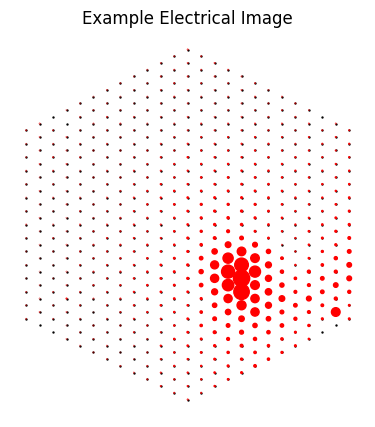

In [58]:
# Plot an example static EI

plot_static_ei_519(ei_example*.25, title="Example Electrical Image")

In [59]:
# Plot an example animated EI

anim = animate_519_array(ei_example, title="Example Electrical Image", presentable=True)
HTML(_anim_to_html(anim, fps=10))